# Version

In [22]:
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
print('Using Version',tf.__version__)

Using Version 2.1.1



# Importing Lib

In [6]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [10]:
y_test.shape

(10000,)

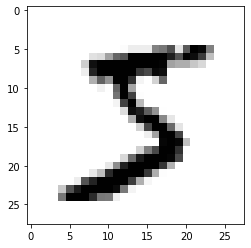

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0],cmap='binary')
plt.show()

# One hot Encoding

In [15]:
from tensorflow.keras.utils import to_categorical
y_train_encoded=to_categorical(y_train)
y_test_encoded=to_categorical(y_test)

In [16]:
y_train_encoded.shape

(60000, 10)

In [17]:
import numpy as np
x_train_reshaped=np.reshape(x_train,(60000,784))
x_test_reshaped=np.reshape(x_test,(10000,784))

In [21]:
x_mean=np.mean(x_train_reshaped)
x_std=np.std(x_train_reshaped)
epsilon= 1e-10
x_train_norm=(x_train_reshaped -x_mean)/(x_std-epsilon)
x_test_norm=(x_test_reshaped -x_mean)/(x_std-epsilon)


# Creating model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential([
    Dense(128,activation='relu',input_shape=(784,)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

In [25]:
model.compile(
    optimizer='sgd',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Training the Model

In [26]:
model.fit(x_train_norm,y_train_encoded,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 161us/sample - loss: 0.3754 - accuracy: 0.8922
Epoch 2/5
60000/60000 [==============================] - 9s 147us/sample - loss: 0.1858 - accuracy: 0.9459
Epoch 3/5
60000/60000 [==============================] - 9s 149us/sample - loss: 0.1397 - accuracy: 0.9593
Epoch 4/5
60000/60000 [==============================] - 8s 129us/sample - loss: 0.1139 - accuracy: 0.9668
Epoch 5/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0958 - accuracy: 0.9721


# Model Evaluation

In [27]:
loss,accuracy=model.evaluate(x_test_norm,y_test_encoded)
print(accuracy)

10000/10000 [==============================] - 1s 89us/sample - loss: 0.1024 - accuracy: 0.9682
0.9682


# Predictions

In [28]:
preds=model.predict(x_test_norm)

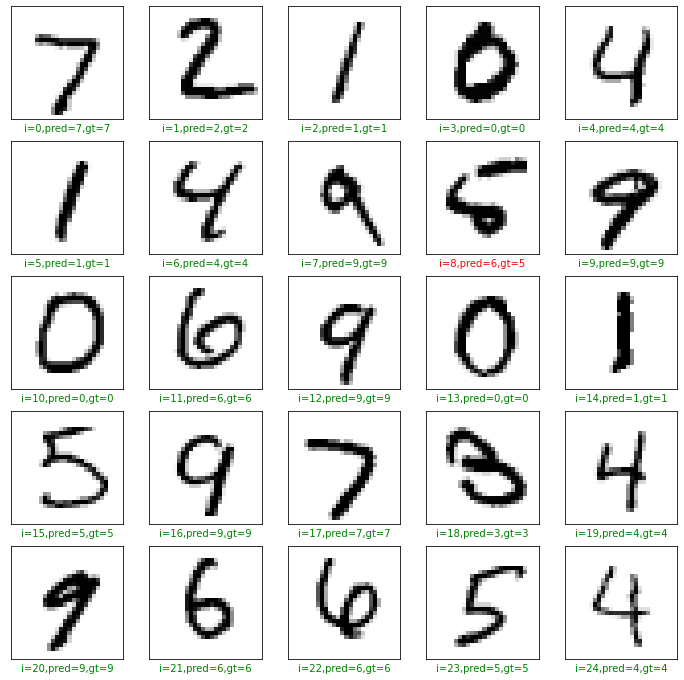

In [36]:
plt.figure(figsize=(12,12))
start_index=0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred=np.argmax(preds[start_index+i])
    gt=y_test[start_index+i]
    col='g'
    if pred!=gt:
        col='r'
    plt.xlabel('i={},pred={},gt={}'.format(start_index+i,pred,gt),color=col)
    plt.imshow(x_test[start_index+i],cmap='binary')
